# Duration and Convexity


## FINM 37400: Fixed Income

### Mark Hendricks

#### Winter 2025

***

# Measuring Sensitivity

Clearly, 
* interest rates move substantially
* this impacts prices 

For fixed income securities, it is important to measure the sensitivity of prices to rates.

Why not estimate this relationship statistically with linear regression? There are **two challenges**:

1. Which interest rate should we analyze?
1. Over the time-series, maturity is changing, making it an inconsistent sample

### Many rates

Fixed income prices depend on (potentially) the entire term structure of rates. 

Thus, we could check sensitivity to...
* the 1-month, 3-month, 1-year, 5-year, 10-year, etc.
* some combination of these rates

### Changing target

Typically, we would estimate a statistical sensitivity using a time-series of data.
* But over time, a bond's maturity changes.
* Thus, we do not have a coherent estimate, as the sensitivity of a 5-year bond may be different than the sensitivity of a 4-year bond.

Note that we do not have this problem as obviously for an equity target. 
* Over a year, a share of Apple does not become a share of GM
* Unless Apple's operation changes enormously, we expect stability in medium-range timeseries.

For bonds, we can not count on this.


### Using math, not just statistical estimation

Fortunately, bonds have a clear mathematical relationship to a certain rate movement.

Thus, we can bypass these two challenges to calculate bond sensitivity.


### Nonlinearity and Taylor Approximation

A bond's price is a nonlinear function of rates.

* Thus, there is no simple and exact formula for this senstivity.
* But we can get a simple approximation.

**Taylor's Approximation**

From a Taylor's approximation to the second order, we have a percentage change in price, $P$ as
$$\begin{align}
\frac{dP}{P} \approx -D\times dr + \frac{1}{2}C\times (dr)^2
\end{align}$$
where 
* $dr$ is a small change in the level of the spot curve
* $D$ is the **duration**
* $C$ is the **convexity**

All three of these aspects are discussed in detail below.

## Sensitivity and Nonlinearity to Rates

In [2]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

import seaborn as sns
from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)
import sys
sys.path.insert(0, '../cmds')
from treasury_cmds import *
#from fixedinc import *

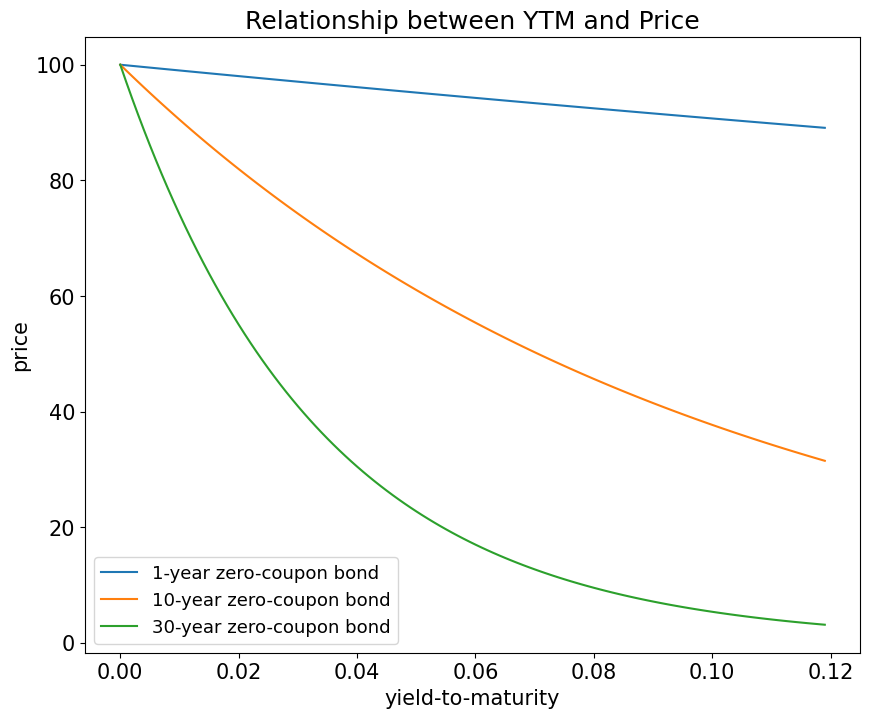

In [3]:
ylds_grid = np.arange(0,.12,.001)
T_grid = [1,10,30]
price_grid = pd.DataFrame(data=np.zeros([len(ylds_grid),len(T_grid)]), index=ylds_grid, columns=T_grid)
for T in T_grid:
    for i,y in enumerate(ylds_grid):
        price_grid.loc[y,T] = 100/(1+y/2)**(2*T)

price_grid.plot(figsize=(10,8))

legend_labels = [''] * len(T_grid)
for i,T in enumerate(T_grid):
    legend_labels[i] = f'{T}-year zero-coupon bond'

plt.xlabel('yield-to-maturity')
plt.ylabel('price')
plt.legend(legend_labels)
plt.title('Relationship between YTM and Price')
plt.show()

***

# Duration Definition

**Duration** refers to the sensitivity of a bond (or other fixed-income product) to the **level of interest rates**.

Rather than measure sensitivity to the 3-month, 1-year, or 10-year rate, measure sensitivity to a parallel shift in all these rates, all else equal.

$$\begin{align}
D \equiv -\frac{1}{P}\frac{dP}{dr}
\end{align}$$

Note the following
* Dduration is a **percentage** change in the price, (via the $1/P$ term).
* We denote the parallel shift in the spot curve with $dr$
* The negative in the definition is so that the resulting duration will be a positive number. ($dP/dr$ is a negative number!)

### Price approximation

If we know the duration of a fixed income asset, then we can approximate the percentage price change in response to a shift in rates. The approximation is

$\begin{align}
\frac{dP}{P} \approx -D\times dr
\end{align}$


### Duration of a zero-coupon bond

For a **zero coupon bond** this derivative has a simple solution:
$$\begin{align}
D_{\text{zero}} \equiv -\frac{1}{P(t,T,0)}\frac{dP(t,T,0)}{dr} = T-t
\end{align}$$

#### For zero-coupon treasuries, duration is equal to the maturity 

The chart below shows CRSP's imputed duration for each bond issue.

In [4]:
QUOTE_DATE = '2024-05-31'
TYPE_PROCESSING = 'crsp'

filepath_rawdata = f'../data/treasury_quotes_{TYPE_PROCESSING}_{QUOTE_DATE}.xlsx'
rawdata = pd.read_excel(filepath_rawdata,sheet_name='quotes')

if TYPE_PROCESSING=='crsp':
    metrics = process_wrds_treasury_data(rawdata)
    metrics['clean price'] = metrics['price'].copy()
    metrics['price'] = metrics['dirty price'].copy()
    metrics.drop(columns=['dirty price'])

else:
    metrics = rawdata

In [5]:
QUOTE_DATE = '2024-05-31'
TYPE_PROCESSING = 'crsp'

filepath_rawdata = f'../data/treasury_quotes_{TYPE_PROCESSING}_{QUOTE_DATE}.xlsx'
rawdata = pd.read_excel(filepath_rawdata,sheet_name='quotes')

if TYPE_PROCESSING=='crsp':
    metrics = process_wrds_treasury_data(rawdata)
    metrics['clean price'] = metrics['price'].copy()
    metrics['price'] = metrics['dirty price'].copy()
    metrics.drop(columns=['dirty price'])

else:
    metrics = rawdata

rawdata.sort_values('TMATDT',inplace=True)
rawdata.set_index('KYTREASNO',inplace=True)

Compare `duration` to `maturity interval`.

As derived, the duration exactly equals the maturity.

In [6]:
display(metrics[metrics['cpn rate']==0].head(5))
display(metrics[metrics['cpn rate']==0].tail(5))

,type,quote date,issue date,maturity date,ttm,accrual fraction,cpn rate,bid,ask,price,accrued int,dirty price,ytm,clean price
KYTREASNO,,,,,,,,,,,,,,
208166,bill,2024-05-31,2024-02-06,2024-06-04,0.010951,0.978097,0.0,99.942167,99.942278,99.942222,0.0,99.942222,0.053476,99.942222
208141,bill,2024-05-31,2023-12-07,2024-06-06,0.016427,0.967146,0.0,99.912583,99.912750,99.912667,0.0,99.912667,0.053901,99.912667
208179,bill,2024-05-31,2024-02-13,2024-06-11,0.030116,0.939767,0.0,99.839278,99.839583,99.839431,0.0,99.839431,0.054077,99.839431
208072,bill,2024-05-31,2023-06-15,2024-06-13,0.035592,0.928816,0.0,99.810417,99.810778,99.810597,0.0,99.810597,0.053981,99.810597
208180,bill,2024-05-31,2024-02-20,2024-06-18,0.049281,0.901437,0.0,99.735500,99.736000,99.735750,0.0,99.735750,0.054419,99.735750


,type,quote date,issue date,maturity date,ttm,accrual fraction,cpn rate,bid,ask,price,accrued int,dirty price,ytm,clean price
KYTREASNO,,,,,,,,,,,,,,
208170,bill,2024-05-31,2024-01-25,2025-01-23,0.648871,1.702259,0.0,96.761000,96.767583,96.764292,0.0,96.764292,0.051339,96.764292
208186,bill,2024-05-31,2024-02-22,2025-02-20,0.725530,1.548939,0.0,96.319444,96.330486,96.324965,0.0,96.324965,0.052279,96.324965
208199,bill,2024-05-31,2024-03-21,2025-03-20,0.802190,1.395619,0.0,95.938694,95.946833,95.942764,0.0,95.942764,0.052304,95.942764
208212,bill,2024-05-31,2024-04-18,2025-04-17,0.878850,1.242300,0.0,95.568417,95.577333,95.572875,0.0,95.572875,0.052193,95.572875
208226,bill,2024-05-31,2024-05-16,2025-05-15,0.955510,1.088980,0.0,95.215792,95.225486,95.220639,0.0,95.220639,0.051916,95.220639


### For coupon-paying treasuries, duration is more complex

Note how different the `maturity interval` and `duration` columns are.

In [7]:
rawdata = pd.read_excel(filepath_rawdata,sheet_name='quotes')
rawdata.columns = rawdata.columns.str.upper()
rawdata.sort_values('TMATDT',inplace=True)
rawdata.set_index('KYTREASNO',inplace=True)

t_check = rawdata['CALDT'].values[0]
if rawdata['CALDT'].eq(t_check).all():
    t_current = t_check
else:
    warnings.warn('Quotes are from multiple dates.')
    t_current = None

rawprices = (rawdata['TDBID'] + rawdata['TDASK'])/2 + rawdata['TDACCINT']
rawprices.name = 'price'

maturity_delta = get_maturity_delta(rawdata['TMATDT'],t_current)
maturity_delta.name = 'maturity delta'

metrics = rawdata.copy()[['TDATDT','TMATDT','TDPUBOUT','TCOUPRT','TDYLD','TDDURATN']]
metrics.columns = ['issue date','maturity date','outstanding','coupon rate','yld','duration']
metrics['yld'] *= 365
metrics['duration'] /= 365
metrics['outstanding'] *= 1e6
metrics['maturity interval'] = get_maturity_delta(metrics['maturity date'], t_current)
metrics['price'] = rawprices

display(f'Treasuries quoted on {QUOTE_DATE}.')

'Treasuries quoted on 2024-05-31.'

In [8]:
display(metrics[(metrics['maturity interval']-metrics['duration'])>10])

,issue date,maturity date,outstanding,coupon rate,yld,duration,maturity interval,price
KYTREASNO,,,,,,,,
207891,2022-05-15,2052-05-15,5.997500e+10,2.875,0.046269,17.622688,27.956194,72.085938
207934,2022-08-15,2052-08-15,5.699400e+10,3.000,0.046203,17.366869,28.208077,74.740814
207977,2022-11-15,2052-11-15,5.697500e+10,4.000,0.046086,16.543699,28.459959,89.744226
208019,2023-02-15,2053-02-15,5.697900e+10,3.625,0.046168,16.786625,28.711841,84.563444
208062,2023-05-15,2053-05-15,5.698700e+10,3.625,0.046104,17.041350,28.955510,83.696671
208107,2023-08-15,2053-08-15,6.297600e+10,4.125,0.046044,16.461132,29.207392,92.689518
208149,2023-11-15,2053-11-15,6.598600e+10,4.750,0.045907,16.234964,29.459274,101.843240
208178,2024-02-15,2054-02-15,4.698700e+10,4.250,0.045962,16.494806,29.711157,94.780606
208233,2024-05-15,2054-05-15,NaN,4.625,0.045923,16.451952,29.954825,99.818274


### Duration of a coupon bond

Duration, (as a derivative,) is a **linear operator**. Accordingly,
* the duration of a portfolio is the weighted average of the duration of the components
* a coupon bond is simply a portfolio of zero coupon bonds

Thus,
$$\begin{align}
D_{\text{portfolio}} = & \sum_{i=1}^n w_iD_i
\end{align}$$
where $D_i()$ denotes the duration of portfolio security $i$, and where $w_i$ denotes the weight (as a fraction) of security $i$ in the portfolio.

Thus, define the weights of the payments of a coupon bond as
$$\begin{align}
w_i \equiv & \frac{c}{2}\frac{P(t,T_i,0)}{P(t,T,c)}\text{ for } 1\le i < n\\
\equiv & \left(1+\frac{c}{2}\right)\frac{P(t,T,0)}{P(t,T,c)}\text{ for } i=n
\end{align}$$
Then
$$\begin{align}
D_{\text{coupon bond}} \equiv& \frac{1}{P(t,T,c)}\frac{dP(t,T,c)}{dr}\\
=& \sum_{i=1}^n w_iD_i\\
=& \sum_{i=1}^n w_i T_i
\end{align}$$
where the final equality uses the result that the duration of a zero-coupon bond is simply the maturity.

#### This final equality shows that the duration of the coupon bond is the weighted average of the cashflow maturities.
$$\begin{align}
D_{\text{coupon bond}} =& \sum_{i=1}^n w_i T_i
\end{align}$$

### Duration as time-to-maturity

We see from above that duration for a standard coupon bond is the weighted average of time to cashflow.

* Sometimes this is given as the definition of duration.

* But this result will not hold for other types of fixed=income securities, (including floating rate bonds.) 

* Thus, consider this a result of duration for standard bonds, but retain the definition as the price sensitivity to a parallel shift in the spot curve.

### Coupon rate

A higher coupon rate decreases the duration. 

* The higher the coupon rate, the more cash that is arriving sooner (before maturity). 
* These coupons are not as affected by changes in the spot rate, as the discounting doesn't compound as long.
* We could also see this as the higher coupon reduces the weighted average of time-to-cash.

***

# Calculating Duration

## Closed-form Duration formula

Usually we calculate duration with a discount curve. 

Alternatively, we can use this formula for a fixed-rate bond 
* paying coupon rate $c$, 
* priced with YTM, $y$, 
* compounded (and coupon paid) with frequency, $n$,
* years-to-maturity is $\tau$.

Then we have,

$$
\renewcommand{\yfreq}{\tilde{y}}
\renewcommand{\cpnfreq}{\tilde{c}}
\renewcommand{\taufreq}{\tilde{\tau}}
$$

The formula for duration is given by:

$$
\text{duration} = \frac{1}{n}\left[\frac{1+\tilde{y}}{\tilde{y}} - \frac{1+\tilde{y} + \tilde{\tau}\left(\tilde{c}-\tilde{y}\right)}{\tilde{c}\left[\left(1+\tilde{y}\right)^{\tilde{\tau}}-1\right] + \tilde{y}}\right]
$$

where $\tilde{y}$ is the YTM divided by the frequency:

$$
\tilde{y} \equiv \frac{y}{n}
$$

and $\tilde{c}$ is the coupon rate divided by the frequency:

$$
\tilde{c} \equiv \frac{c}{n}
$$

and $\tilde{\tau}$ is the time-to-maturity **multiplied** by the frequency:

$$
\tilde{\tau} \equiv n \times \tau
$$

In the scenario that the bond is priced at par, with the coupon rate equal to the YTM, then the formula is simply:

$$
\text{duration} = \frac{1}{n}\frac{1+\tilde{y}}{\tilde{y}}\left(1 - \frac{1}{\left(1+\tilde{y}\right)^{\tilde{\tau}}}\right)
$$


***

## Numerical Approach

### Import a spot curve

In [15]:
MODEL = nelson_siegel

RESTRICT_YLD = True
RESTRICT_TIPS = True

RESTRICT_DTS_MATURING = False
RESTRICT_REDUNDANT = False

data = filter_treasuries(rawdata, t_date=t_current, filter_yld = RESTRICT_YLD, filter_tips = RESTRICT_TIPS, drop_duplicate_maturities=RESTRICT_REDUNDANT)

CF = filter_treasury_cashflows(calc_cashflows(data),filter_maturity_dates=RESTRICT_DTS_MATURING)

prices = metrics['price'][CF.index]

params = estimate_rate_curve(nelson_siegel,CF,t_current,prices)
if MODEL == nelson_siegel_extended:
    x0 = np.concatenate((params_NS,(1,1)))
    params = estimate_rate_curve(nelson_siegel_extended,CF,t_current,prices,x0=x0)

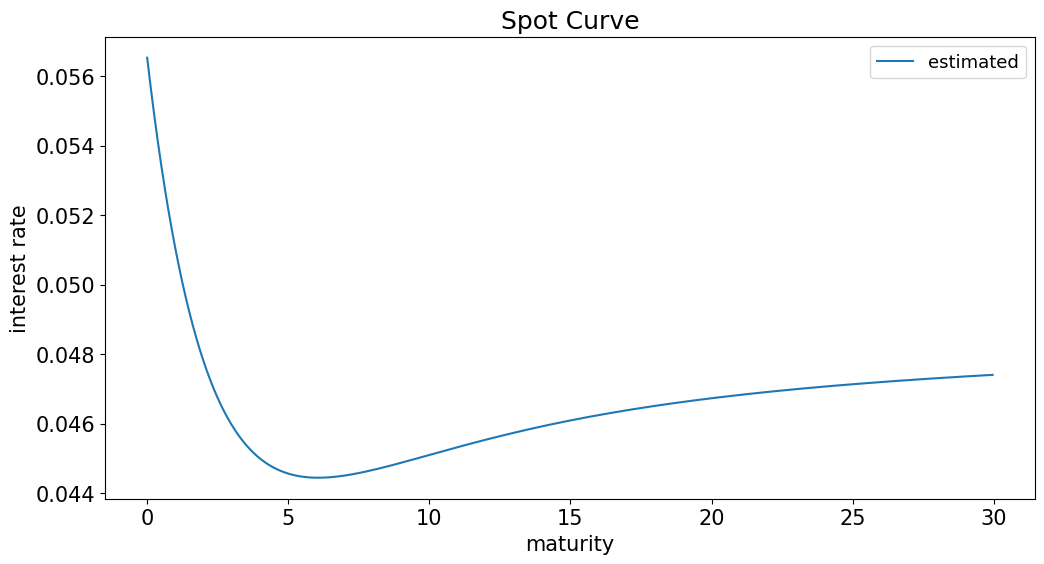

In [16]:
maturity_grid = get_maturity_delta(CF.columns,t_current)
curve = nelson_siegel(params,maturity_grid)

curves = pd.DataFrame(index = maturity_grid)
if MODEL == nelson_siegel_extended:
    curves['estimated']= nelson_siegel_extended(params,maturity_grid)
else:
    curves['estimated'] = nelson_siegel(params,maturity_grid)

curves.plot(xlabel='maturity',ylabel='interest rate',title='Spot Curve')
plt.show()

In [11]:
discount = pd.DataFrame(index=CF.columns,dtype=float)
for col in curves:
    discount[col] = intrate_to_discount(curves[col].values,curves.index.values)

prices_shifted = CF @ discount

In [18]:
#CF = calc_cashflows(rawdata)

CF_prices = price_with_rate_model(params,CF,t_current,MODEL,price_coupons=True)
model_prices = CF_prices.sum(axis=1)

CF_wts = CF_prices.div(model_prices,axis=0)
display(CF_wts.iloc[-5:,-10:].style.format('{:.2%}'))

CF_intervals = get_maturity_delta(CF.columns.to_series(),t_current)
model_duration = (CF_wts * CF_intervals).sum(axis=1)

,2052-02-15 00:00:00,2052-05-15 00:00:00,2052-08-15 00:00:00,2052-11-15 00:00:00,2053-02-15 00:00:00,2053-05-15 00:00:00,2053-08-15 00:00:00,2053-11-15 00:00:00,2054-02-15 00:00:00,2054-05-15 00:00:00
KYTREASNO,,,,,,,,,,
208062,0.00%,0.58%,0.00%,0.57%,0.00%,31.25%,0.00%,0.00%,0.00%,0.00%
208107,0.61%,0.00%,0.59%,0.00%,0.58%,0.00%,27.94%,0.00%,0.00%,0.00%
208149,0.00%,0.63%,0.00%,0.61%,0.00%,0.60%,0.00%,25.24%,0.00%,0.00%
208178,0.61%,0.00%,0.60%,0.00%,0.58%,0.00%,0.57%,0.00%,26.72%,0.00%
208233,0.00%,0.63%,0.00%,0.61%,0.00%,0.60%,0.00%,0.58%,0.00%,25.13%


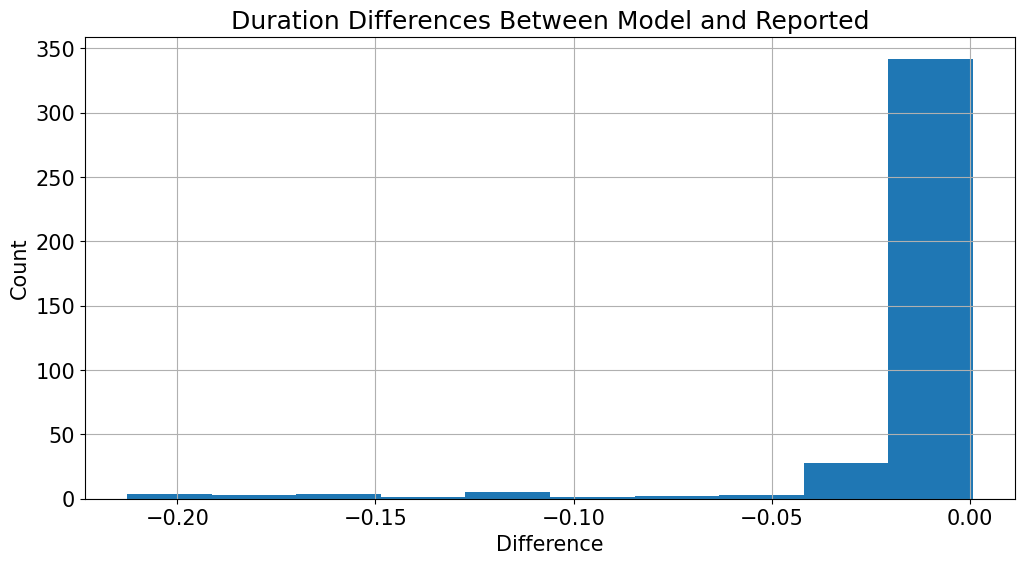

In [23]:
duration = pd.DataFrame({'analytic duration':model_duration,'quoted duration':metrics['duration'][CF.index]},index=CF.index)
duration['diff'] = duration['analytic duration'] - duration['quoted duration']

duration['diff'].hist()
plt.title('Duration Differences Between Model and Reported')
plt.xlabel('Difference')
plt.ylabel('Count')
plt.show()

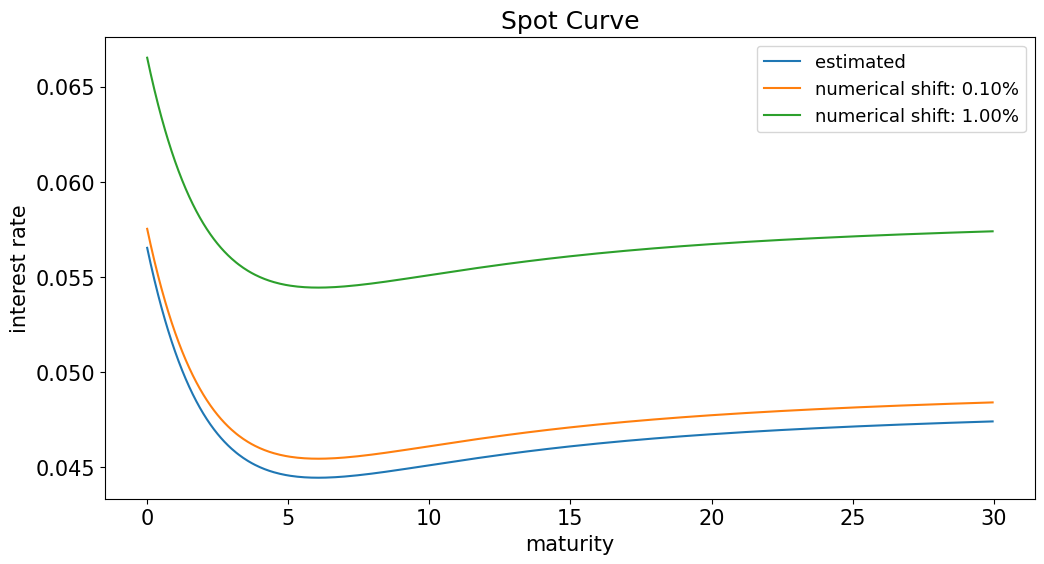

In [24]:
dr_list = [.0010, .0100]
for dr in dr_list:
    curves[f'numerical shift: {dr:.2%}'] = curves['estimated'] + dr

curves.plot(xlabel='maturity',ylabel='interest rate',title='Spot Curve')
plt.show()

### Continuing

In [25]:
def price_bond(dr,KYTREASNO):
    
    p = prices_shifted.loc[KYTREASNO,'estimated']
    
    dp_duration = p * (-duration.loc[KYTREASNO,'analytic duration'] * dr)
    dp_convexity = dp_duration + p * .5 * (CF_wts.loc[KYTREASNO,:] * CF_intervals**2).sum() * dr**2
    
    prices = pd.Series(index=['estimated','duration','convexity'],dtype=float)
    prices.loc['duration'] = p + dp_duration
    prices.loc['convexity'] = p + dp_convexity
    
    disc = pd.Series(intrate_to_discount(curves['estimated'].values+dr,curves.index.values))
    disc.index = CF.columns
    prices.loc['estimated'] = CF.loc[KYTREASNO,:] @ disc

    return prices

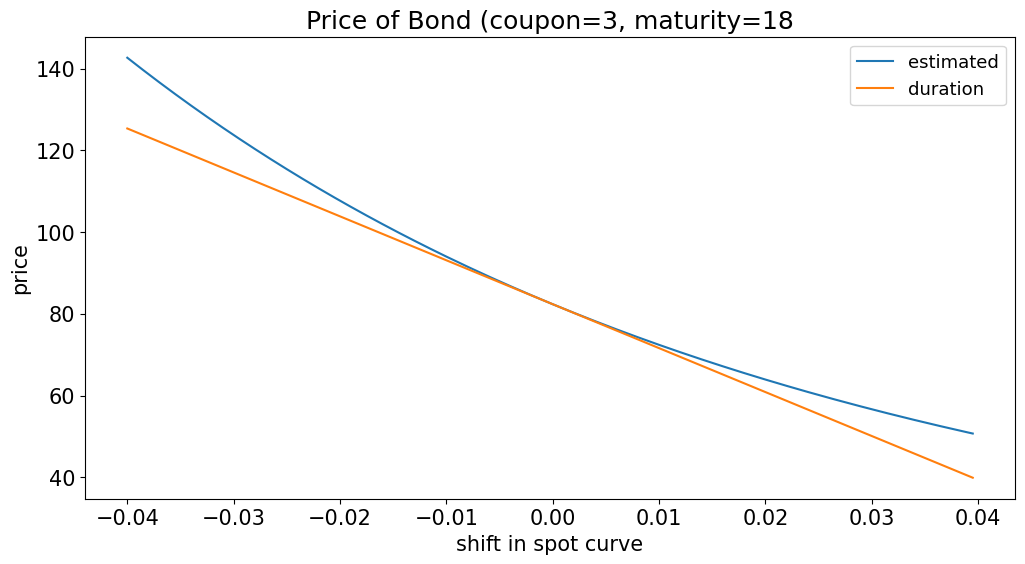

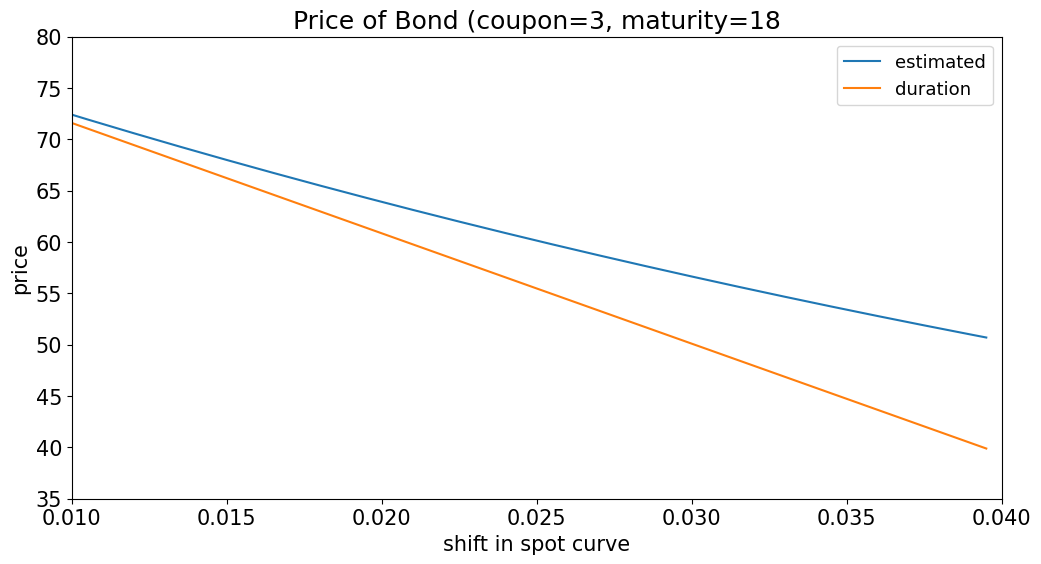

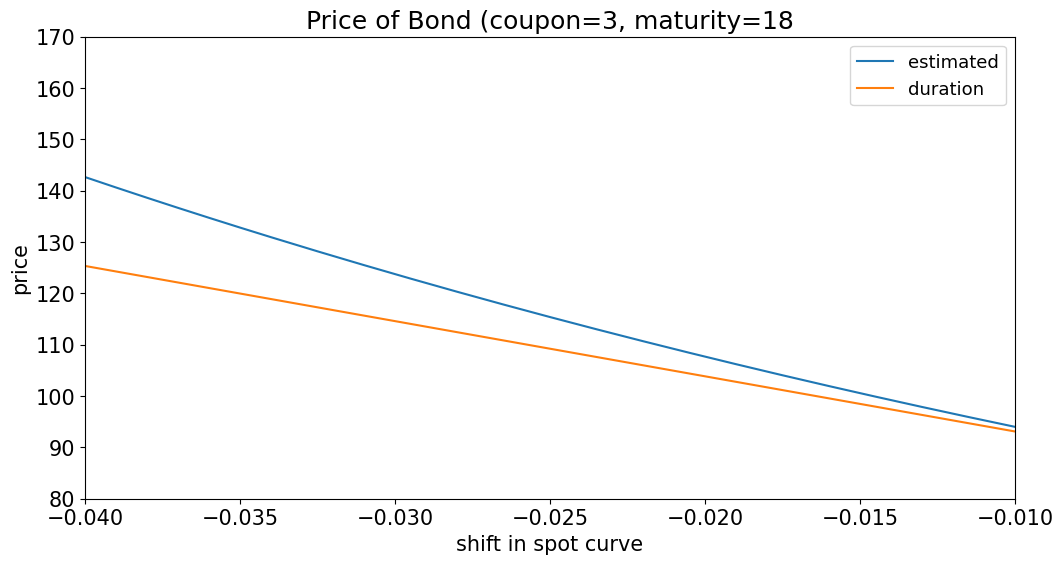

In [26]:
drgrid = np.arange(-.04,.04,.0005)
KYTREASNO = 206341

temp = pd.DataFrame(index=drgrid,dtype=float,columns=['estimated','duration','convexity'])
for dr in drgrid:
    temp.loc[dr,:] = price_bond(dr,KYTREASNO)

mat = metrics.loc[KYTREASNO,'maturity interval']
coup = metrics.loc[KYTREASNO,'coupon rate']

plottitle = f'Price of Bond (coupon={coup:.0f}, maturity={mat:.0f}'
temp[['estimated','duration']].plot(ylabel='price',xlabel='shift in spot curve',title=plottitle)
plt.show()

temp[['estimated','duration']].plot(ylabel='price',xlabel='shift in spot curve',title=plottitle,xlim=(.01,.04),ylim=(35,80))
plt.show()

temp[['estimated','duration']].plot(ylabel='price',xlabel='shift in spot curve',title=plottitle,xlim=(-.04,-.01),ylim=(80,170))
plt.show()

***

## Other Durations

### Dollar Duration

This version simply reports the change in dollar terms rather than percentage of price terms:

$\begin{align}
\text{dollar duration} = D_{\$} \equiv -\frac{dP}{dr}
\end{align}$

### Macauley Duration

The definition of duration above is a response to a parallel shift in the **spot curve**. This is sometimes known as **Macauley Duration**.

### Modified Duration

Modified duration considers a move in the bond's YTM instead of a shift in the entire **spot curve**.

It requires a small modification to the duration formula above, at least for standard coupon bonds:

$\begin{align}
\text{modified duration} \equiv D_{\text{ytm}} \equiv &  \quad \frac{1}{1+y/2} D \\
=&  -\frac{1}{1+y/2}\frac{1}{P}\frac{dP}{dr}
\end{align}$

#### Modified duration is less useful.

It is a sensitivity to a change in the YTM, but YTM is specific to a particular instrument, so a shift in this ``curve'' is not well specified.

Furthermore, for more complicated instruments, the YTM will not be defined, and thus Modified duration is not well defined. However, our definition of duration is defined, notwithstanding the complexity of the instrument.

***

# Convexity

Duration approximates the bond's price change with a linear approximation, (the first derivative.)

This approximation is good for small changes in the rate, but it is inadequate for larger changes.

Accordingly, we may find a second-order approximation beneficial.

This second-order term is known as the **convexity** of the bond.

## Price approximation

$\begin{align}
\frac{dP}{P} \approx -D\times dr + \frac{1}{2}C\times (dr)^2
\end{align}$

where $C$ denotes the convexity of the bond,

$\begin{align}
C \equiv & \frac{1}{P}\frac{d^2P}{dr^2}
\end{align}$


## Zero coupon bond

For a zero-coupon bond, one can show that the convexity is

$\begin{align}
C =& \frac{1}{P(t,T,0)}\frac{d^2P(t,T,0)}{dr^2}\\
=& (T-t)^2
\end{align}$


## Coupon bonds

Again, we rely on the result that a coupon bond may be decomposed as a portfolio of zero-coupon bonds (STRIPS).

For a portfolio with weights $w_i$ in securities each with convexity, $C_i$, we have,

$\begin{align}
C = \sum_{i=1}^n w_iC_i
\end{align}$

Then for a coupon bond with cashflows at times $T_i$, we once again decompose it as follows,

$\begin{align}
C =& \sum_{i=1}^n w_i(T_i-t)^2\\
w_i \equiv& \frac{c}{2}\frac{P(t,T_i,0)}{P(t,T,c)}\text{ for }1\le i < n\\
w_n \equiv& \left(1+\frac{c}{2}\right)\frac{P(t,T,0)}{P(t,T,c)}
\end{align}$

where these are the same weights used for the coupon bond duration calculation.

## Positive convexity and returns

In the charts above, note that the duration approximation always underestimates the actual price.

This is not a fluke of this data; rather, it is a general property.

Furthermore, note that convexity as given in the definitions above is always positive.

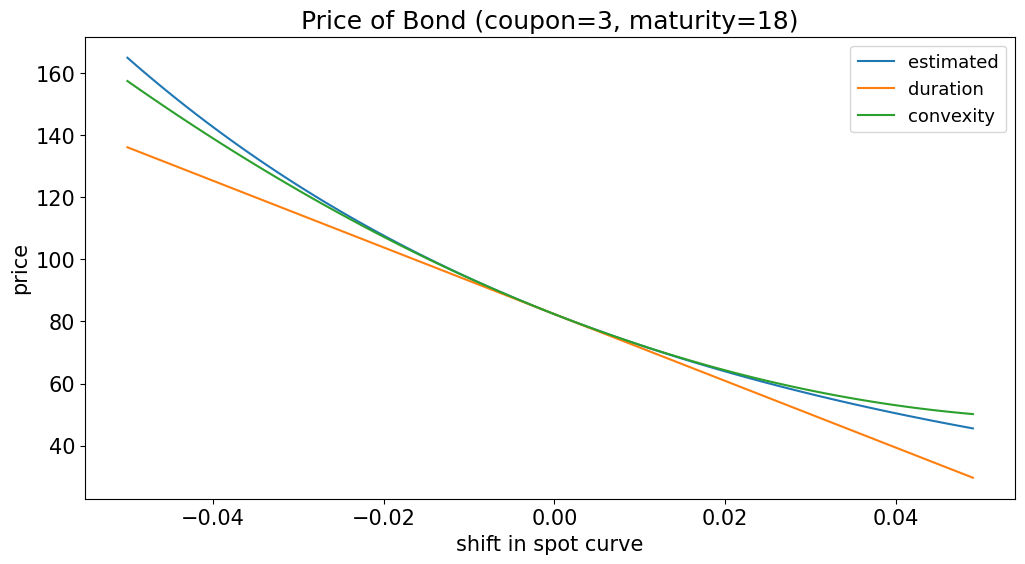

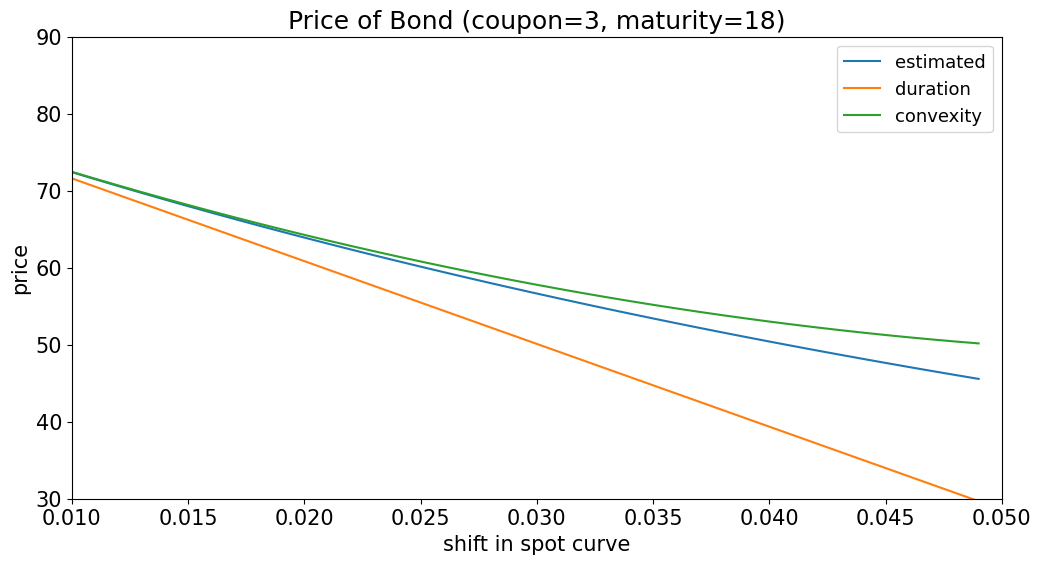

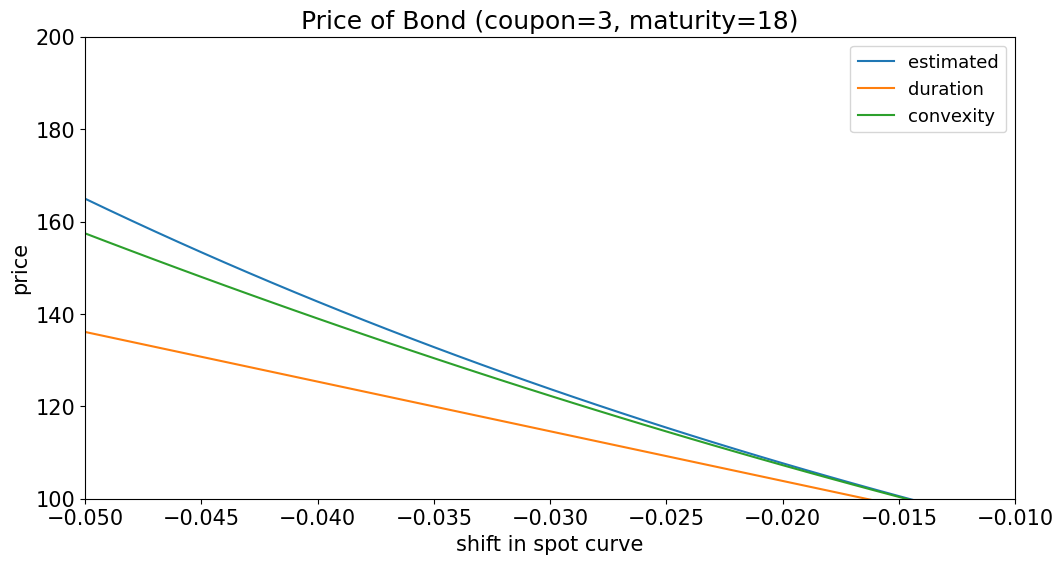

In [16]:
drgrid = np.arange(-.05,.05,.001)
KYTREASNO = 206341

temp = pd.DataFrame(index=drgrid,dtype=float,columns=['estimated','duration','convexity'])
for dr in drgrid:
    temp.loc[dr,:] = price_bond(dr,KYTREASNO)

mat = metrics.loc[KYTREASNO,'maturity interval']
coup = metrics.loc[KYTREASNO,'coupon rate']

plottitle = f'Price of Bond (coupon={coup:.0f}, maturity={mat:.0f})'
temp.plot(ylabel='price',xlabel='shift in spot curve',title=plottitle)
plt.show()

temp.plot(ylabel='price',xlabel='shift in spot curve',title=plottitle,xlim=(.01,.05),ylim=(30,90))
plt.show()

temp.plot(ylabel='price',xlabel='shift in spot curve',title=plottitle,xlim=(-.05,-.01),ylim=(100,200))
plt.show()

***

# Beyond Parallel Shifts

Potentially, the entire spot curve matters for pricing.

We may want to check sensitivity to other aspects of the curve, not just parallel shifts.




## Factor Duration

Instead of analyzing the sensitivity of price to a parallel shift in rates, we could analyze a change to the principal components of the curve.

### Zero coupon bond
Consider a zero-coupon bond with maturity $T_i$. Then,

$\begin{align}
D_{\text{pca}} \equiv&  -\frac{1}{P(t,T_i,0)}\frac{dP(t,T_i,0)}{dz}\\
=& -\frac{1}{P}\frac{dP(t,T_i,0)}{dr_i}\frac{dr_i}{dz}\\
=& (T_i-t)\frac{dr_i}{dz}\\
=& (T_i-t)\phi_{i}
\end{align}$

where $\phi_i$ is the loading (beta) of $r_i$ on $z$.


### Coupon bond

Suppose a coupon bond pays coupons at $n$ dates, denoted $T_i$ for $1\le i\le n$.

Then, we modify the earlier duration formula for a coupon bond, again decomposing it as a portfolio of zero-coupon STRIPS.

$\begin{align}
D_{\text{z}} \equiv&  -\frac{1}{P(t,T,c)}\frac{dP(t,T,c)}{dz}\\
=& \sum_{i=1}^n w_i (T_i-t) \phi_i
\end{align}$

### Price approximation

Suppose we want to approximate the percentage price change across several factors, $z_1, z_2, \ldots$. Then we can use the approximation,

$\begin{align}
\frac{dP}{P} \approx -D_{z_1}\times dz_1 -D_{z_2}\times dz_2 -D_{z_3}\times dz_3
\end{align}$

### This approach would work for any chosen factor, $z$. But it is especially useful for PCA.
* The PCs are orthogonal, meaning it is interpretable to consider a shock to $z_1$ holding everything else constant. If we choose correlated factors, it is harder to interpret a change in $z_1$ holding $z_2$ constant.
* By construction, the PCs explain a large amount of rate variation.
* The PCs happen to lead to interpretable factors: level, slope, and curvature.
* Finally, with principal components, there is no extra step to estimating the loadings, $\phi_i$, as they are calculated in determining the PCs. (No need to run extra regressions.)

See the PCA loadings, $\phi_{j,i}$ below.